## Heart Disease Indicator Decision Tree Project

### Data Set

Dataset containing information of American citizens taken in 2020. Dataset obtained from Kaggle at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease, original data obtained by the Center for Disease Control and Prevention.

Dataset contains the columns:

- HeartDisease: If the person has heart disease
- BMI: Body mass index (weight in kg / (height in m)^2)
- Smoking: If the person smokes
- AlcoholDrinking: If the person drinks alcohol
- Stroke: If the person has suffered from a stroke
- PhysicalHealth: Person's physical health
- MentalHealth: Person's mental health
- DiffWalking: Does the person have difficulty walking
- Sex: Male or female
- Age Category: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 80 or older
- Race: American Indian/Alaskan Native, Black, Hispanic, Other, White
- Diabetic: If the person is diabetic
- Physical Activity: Does the person participate in physical activity
- GenHealth: Quality of person's general health. Poor, Fair, Good, Very Good, Excellent
- SleepTime: Amount of sleep in hours
- Asthma: If the person has asthma
- KidneyDisease: If the person has kidney disease
- SkinCancer: If the person has skin cancer

PhysicalHealth and MentalHealth columns were removed before model training as the majority of the data was empty and no information was provided on how the result was arrived at. 

### Findings

From performing operations on this data set, I have found that the decision tree model is very good at predicting the absence of heart disease. The overall accuracy of the model was quite high at 0.86 and a specificity of 0.92. However, the model is not good at correctly predicting the presence of heart disease. This is clearly shown through the precision and recall scores of 0.23 and 0.24 respectively. I think these findings show the risk of relying on machine learning models in medicine. As we are dealing with people's health and wellbeing, we must try to be as accurate as possible with diagnosis. Due to this, despite being accurate as a whole, this model would serve no real world benefit.




In [30]:
# import all required libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [31]:
# read data from file

df = pd.read_csv('heartDiseaseIndicators.csv')

In [32]:
# select target column and feature columns
# encode categorical data

x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
x = pd.get_dummies(x, drop_first=True)
y = pd.get_dummies(y, drop_first=True)

In [33]:
# randomly select data to split into training and test data, 30% test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 18)

In [34]:
# fit decision tree model

model = DecisionTreeClassifier(random_state=18)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=18)

In [35]:
# predict values

y_pred = model.predict(x_test)

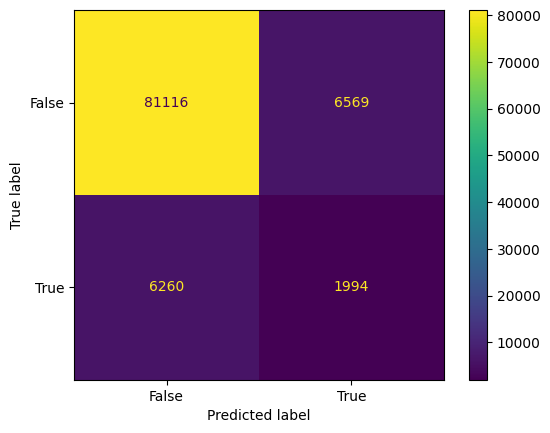

In [36]:
# create confusion matrix
# display confusion matrix as heatmap

cm = confusion_matrix(y_test, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot(cmap='viridis')

In [37]:
# assign values for true positive, true negative, false positive, false negative

tp = 1994
tn = 81116
fp = 6569
fn = 6260

In [38]:
# calculate and display:
# accuracy: measure of proportion of correct predictions made out of all predictions
# precision: measure of proportion of true positive predictions out of all positive predictions
# recall: measure of proportion of true positive predictions out of all positive cases
# specificity: measure of proportion of true negative predictions out of all negative cases
# F1: harmonic mean of precision and recall
# for all values, the closer the value is to 1, the higher the accuracy

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = (tp) / (tp + fp)
recall = (tp) / (tp  + fn)
specificity = (tn) / (tn + fp)
F1 = (2 * tp) / ((2 * tp) + fp + fn)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1: {F1}")


Accuracy: 0.8662796151721406
Precision: 0.23286231460936588
Recall: 0.24157984007753816
Specificity: 0.9250841078861834
F1: 0.23714098828566332


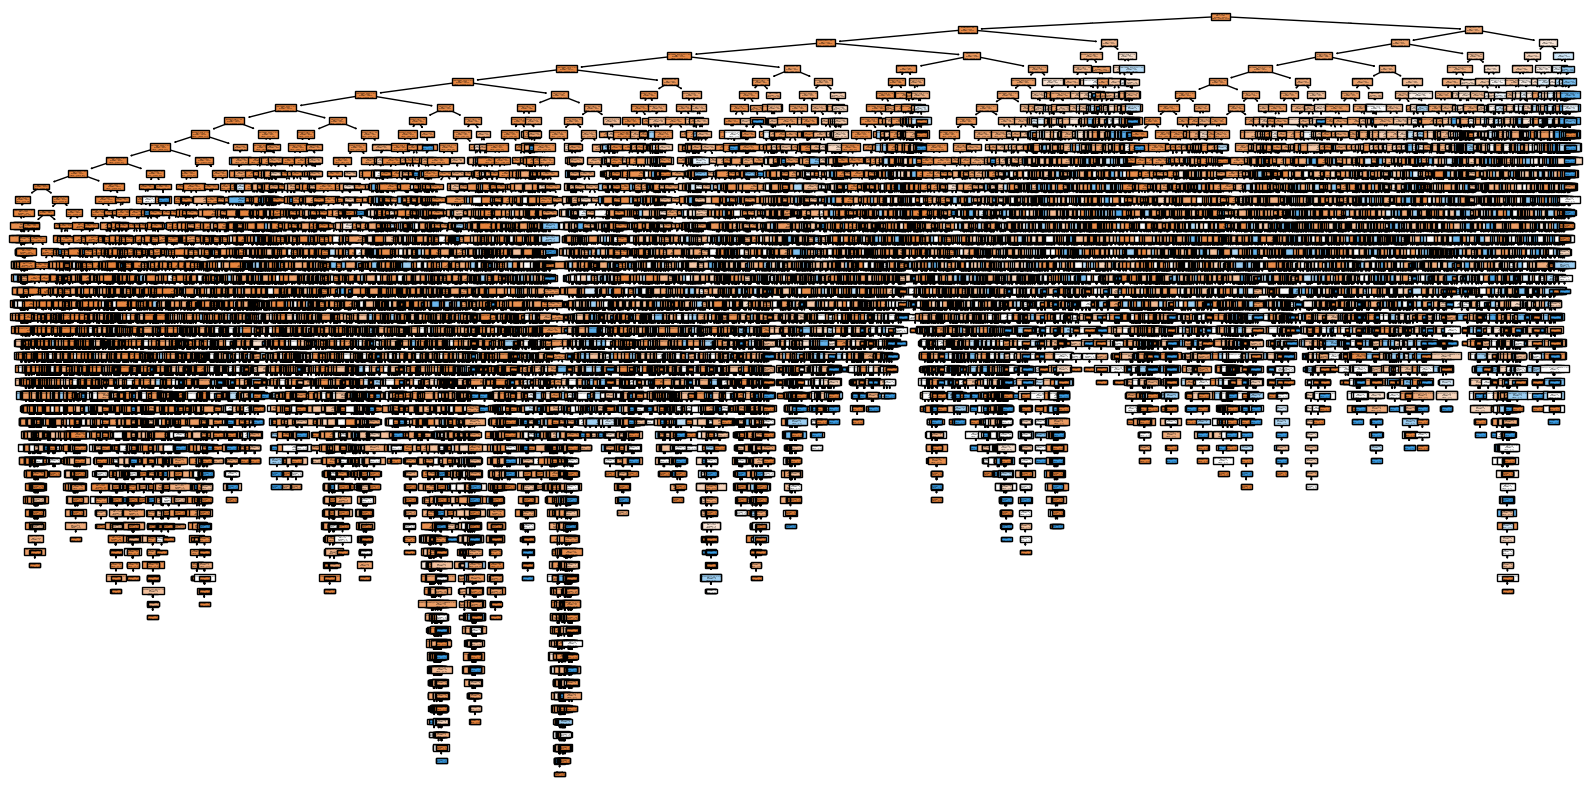

In [39]:
# display decision tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=x_train.columns, filled=True)
plt.show()